In [171]:
# geojson file of river test
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects
from shapely.geometry import LineString, MultiLineString

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# river50m = gpd.read_file('./river/ne_10m_lakes/ne_10m_lakes.shp')
# huanghe = river50m[river50m['name_zh'] == '維多利亞湖']
# huanghe['name_en']
river50m = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
huanghe = river50m[river50m['name_en'] == 'Jefferson']
huanghe

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_sv,name_tr,name_vi,name_zh,name_fa,name_he,name_uk,name_ur,name_zht,geometry


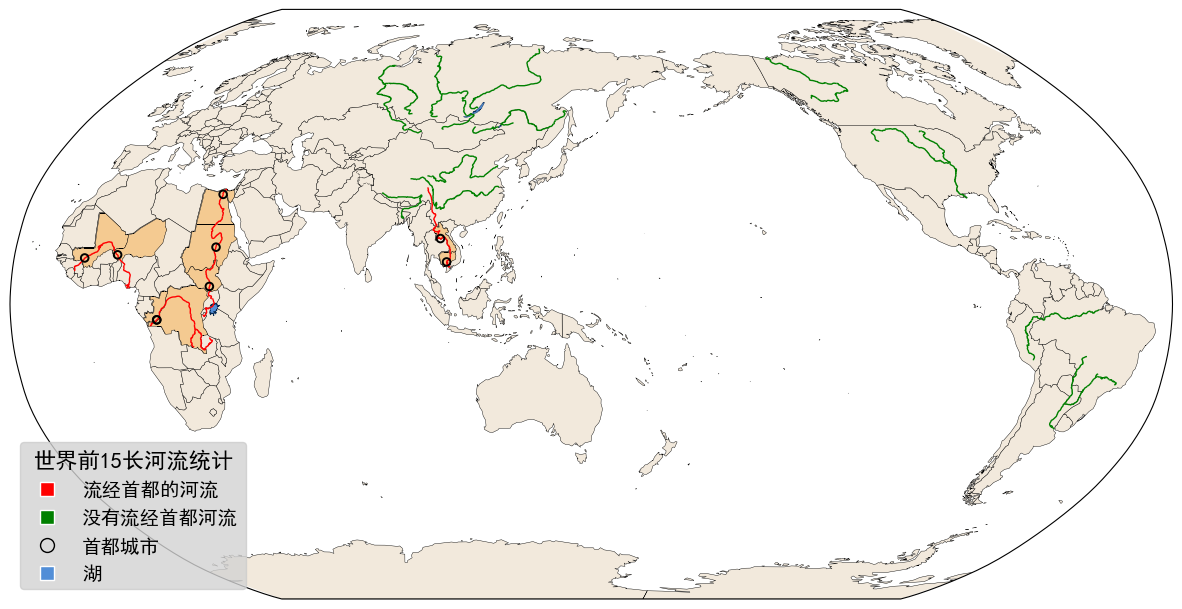

In [ ]:
# 世界前十五长河流

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic
from matplotlib.lines import Line2D


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 


def loopFillColorRiver(ax, river_list, rivers, color):
    for river in river_list:
        river_data = rivers[rivers['name_en'] == river]
        if not river_data.empty:
            river_data.plot(ax=ax, color=color, linewidth=1, transform=ccrs.PlateCarree())


def loopFillColorLake(ax, lake_list, lakes, color, edgecolor):
    for lake in lake_list:
        lake_data = lakes[lakes['name_en'] == lake]
        if not lake_data.empty:
            lake_data.plot(ax=ax, color=color, edgecolor=edgecolor, linewidth=0.3, transform=ccrs.PlateCarree())


def loopFillColor(ax, world, countryList, color):
    for country in countryList:
        country_data = world[world['name'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())


lat1, lon1 = 17.96232562580174, 102.61118194031367   # 万象
lat2, lon2 = 11.557384130754683, 104.92773994940228   # 金边
lat3, lon3 = 30.046440937603307, 31.235117558539653   # 开罗
lat4, lon4 = 15.600067138432657, 32.529402767155034   # 喀土穆
lat5, lon5 = 4.854133127611956, 31.582505970121243   # 朱巴
lat6, lon6 = -4.303620336484073, 15.31254804749304   # 金沙萨
lat7, lon7 = -4.271532257282476, 15.277094297066055   # 布拉柴维尔
lat8, lon8 = 12.648269458834022, -7.996869335873068   # 巴马科
lat9, lon9 = 13.511233652392134, 2.125040884212267   # 尼亚美


world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
rivers = gpd.read_file('./river/ne_50m_rivers_lake_centerlines.shp')
rivers_plugin = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
rivers = rivers.to_crs(ccrs.PlateCarree())
rivers_plugin = rivers_plugin.to_crs(ccrs.PlateCarree())
lakes = gpd.read_file('./river/ne_10m_lakes/ne_10m_lakes.shp')
lakes = lakes.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(central_longitude=150)})
world.plot(ax=ax, color='#F2E9DC', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

river_list = ['Nile', 'White Nile', 'Damietta Branch', 'Kagera', 'Mekong', 'Congo', 'Lualaba', 'Luvua', 'Luapula', 'Chambeshi', 'Niger']
loopFillColorRiver(ax, river_list, rivers, "red")
river_list2 = ['Amazon', 'Ucayali', 'Tambo', 'Yangtze', 'Jinsha', 'Tongtian', 'Tuotuo He', 'Yellow', 'Huang', 'Mississippi', 'Missouri',
               'Madison', 'Yenisey',
               'Verkhniy Yenisey', 'Angara', 'Selenga', 'Ider', 'Amur', 'Argun', 'Kherlen', 'Ob', 'Irtysh', 'Paraná', 'Paraná River',
               'Lena', 'Mackenzie', 'Slave', 'Peace', 'Finlay', 'Brahmaputra', 'Yarlung', 'Damqogkanbab']
loopFillColorRiver(ax, river_list2, rivers, "green")

# Q386331 格兰德河/Q641020 克鲁伦河/Q1480564 Tambo/
river_plugin_green = rivers_plugin[rivers_plugin['wikidataid'].isin(['Q386331', 'Q641020'])]
river_plugin_green.plot(ax=ax, color='green', linewidth=1, transform=ccrs.PlateCarree())
river_plugin_red = rivers_plugin[rivers_plugin['wikidataid'].isin(['Q220839', 'Q151858', 'Q777999'])]
river_plugin_red.plot(ax=ax, color='red', linewidth=1, transform=ccrs.PlateCarree())

lake_list = ['Baikal', 'Hulun', 'Nyanza']
loopFillColorLake(ax, lake_list, lakes, "#528ED7", "#062851")

countries_to_fill = ['柬埔寨', '老挝', '刚果（金）', '刚果（布）', '马里', '尼日尔', '埃及', '苏丹', '南苏丹']
loopFillColor(ax, world, countries_to_fill, "#F4CA91")

lonList = [lon1, lon2, lon3, lon4, lon5, lon6, lon7, lon8, lon9]
latList = [lat1, lat2, lat3, lat4, lat5, lat6, lat7, lat8, lat9]
ax.scatter(lonList, latList, edgecolor='black', facecolor='none', marker='o', s=30, linewidths=1.4, zorder=5, transform=ccrs.PlateCarree())

plugin = gpd.read_file('./kml2geojson/Kashmir.geojson')
plugin = plugin.to_crs(ccrs.PlateCarree())
plugin.plot(ax=ax, color='none', edgecolor='k', linewidth=0.3, linestyle='-.', transform=ccrs.PlateCarree())

boder = gpd.read_file('./kml2geojson/border_plugin.geojson')
boder = boder.to_crs(ccrs.PlateCarree())
boder.plot(ax=ax, color="#F2E9DC", linewidth=0.4, linestyle=':', transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='流经首都的河流', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=10, label='没有流经首都的河流', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='none', markersize=10, linewidth=5, label='首都城市', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#528ED7', markersize=10, label='湖', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='世界前15长河流统计', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
plt.savefig('river.png', dpi=1200, bbox_inches='tight')
plt.show()


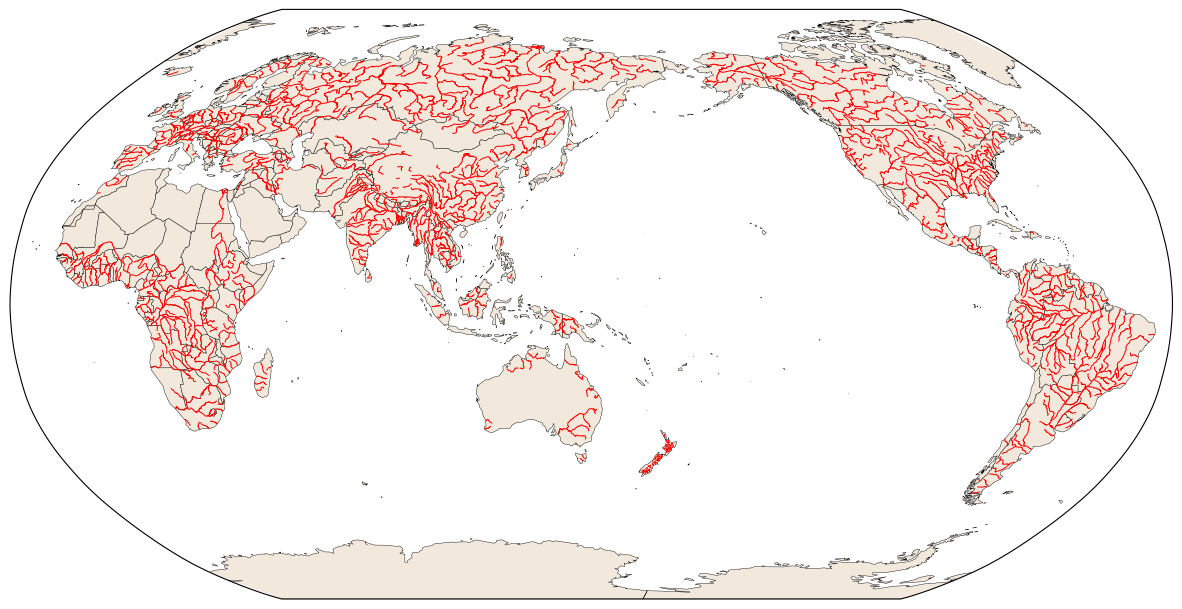

In [ ]:
# 全部河流-ne_10m_rivers_lake_centerlines

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from geopy.distance import geodesic
from matplotlib.lines import Line2D


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
rivers = gpd.read_file('./river/ne_50m_rivers_lake_centerlines.shp')
rivers_plugin = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
rivers = rivers.to_crs(ccrs.PlateCarree())
rivers_plugin = rivers_plugin.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(central_longitude=150)})
world.plot(ax=ax, color='#F2E9DC', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
rivers_plugin.plot(ax=ax, color='red', linewidth=0.7, transform=ccrs.PlateCarree())


plugin = gpd.read_file('./kml2geojson/Kashmir.geojson')
plugin = plugin.to_crs(ccrs.PlateCarree())
plugin.plot(ax=ax, color='none', edgecolor='k', linewidth=0.3, linestyle='-.', transform=ccrs.PlateCarree())

boder = gpd.read_file('./kml2geojson/border_plugin.geojson')
boder = boder.to_crs(ccrs.PlateCarree())
boder.plot(ax=ax, color="#F2E9DC", linewidth=0.4, linestyle=':', transform=ccrs.PlateCarree())

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
plt.savefig('river_all.png', dpi=1200, bbox_inches='tight')
plt.show()


Skipping field center: unsupported OGR type: 3
Skipping field centroid: unsupported OGR type: 3
Skipping field acroutes: unsupported OGR type: 1


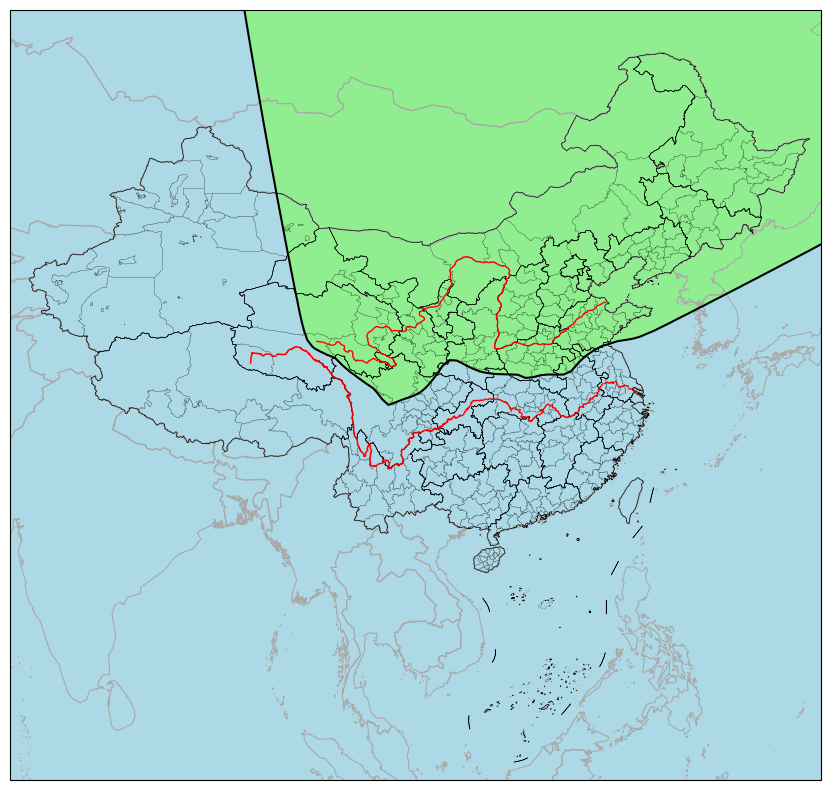

In [27]:
# 黄河长江的中线
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from shapely.geometry import Point, LineString
from matplotlib.lines import Line2D
from geopy.distance import geodesic
import cartopy.feature as cfeature


# 设置字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

world_big = gpd.read_file('./worldmap4/world.geojson')
world_big = world_big.to_crs(ccrs.PlateCarree())
world = gpd.read_file('./chinamap/china_city.geojson')
world = world.to_crs(ccrs.PlateCarree())
province = gpd.read_file('./chinamap/geo_china.json')
province = province.to_crs(ccrs.PlateCarree())

# 读取 Shapefile 数据
# river1 = gpd.read_file('./shp2json/world_river_50m.geojson')
# # changjiang = river1[(river1['name_zh'] == '长江') | (river1['name_zh'] == '金沙江') | (river1['name_zh'] == '通天河') | (river1['name_zh'] == '沱沱河')]
# # changjiang = changjiang.to_crs(ccrs.PlateCarree())
river1 = gpd.read_file('./river/level1/level1.shp')
river1 = river1.to_crs(ccrs.PlateCarree())
changjiang = river1[river1['NAME'] == '长江'] 
jinshajiang = river1[river1['NAME'] == '金沙江']
tongtianhe = river1[river1['NAME'] == '通天河']
tuotuohe = river1[river1['NAME'] == '沱沱河']
changjiang = pd.concat([changjiang, jinshajiang, tongtianhe, tuotuohe])


river2 = gpd.read_file('./shp2json/world_river_50m.geojson')
huanghe = river2[(river2['name_zh'] == '黄河') ]
huanghe = huanghe.to_crs(ccrs.PlateCarree())

line1 = changjiang['geometry'].union_all()
line2 = huanghe['geometry'].union_all()

# 创建绘图对象
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=150)})
world_big.plot(ax=ax, color='none', edgecolor='darkgrey', linewidth=0.8, transform=ccrs.PlateCarree())
world.plot(ax=ax, color='none', edgecolor='k', linewidth=0.1, transform=ccrs.PlateCarree())
province.plot(ax=ax, color='none', edgecolor='k', linewidth=0.4, transform=ccrs.PlateCarree())

gpd.GeoSeries([line1, line2]).plot(ax=ax, color='red', edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())

# 生成经纬度网格; 计算每个网格点到这两条线的距离差
lats = np.linspace(-90, 90, 300)
lons = np.linspace(-180, 180, 600)
lon_grid, lat_grid = np.meshgrid(lons, lats)
distance_diff = np.zeros(lon_grid.shape)

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        point = Point(lon_grid[i, j], lat_grid[i, j])
        d1 = line1.distance(point)
        d2 = line2.distance(point)
        distance_diff[i, j] = d1 - d2  # 计算距离差

# 绘制轮廓线
contourf = ax.contourf(lon_grid, lat_grid, distance_diff, levels=[-1e10, 0, 1e10], colors=["lightblue", 'lightgreen'], transform=ccrs.PlateCarree(), zorder=0)
contour = ax.contour(lon_grid, lat_grid, distance_diff, levels=[0], colors='k', transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN, facecolor='k', zorder=0)
# 设置图例
# legend_elements = [
#     Line2D([0], [0], marker='o', color='k', markerfacecolor='lightblue', markersize=10, label='距离黄河更近', linestyle='None'),
#     Line2D([0], [0], marker='o', color='k', markerfacecolor='lightgreen', markersize=10, label='距离长江更近', linestyle='None')
# ]
# legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize='large')
# legend.get_frame().set_facecolor('lightgray')

# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([72, 136, 2, 56], crs=ccrs.PlateCarree())
plt.savefig('river.png', dpi=1200, bbox_inches='tight')
plt.show()


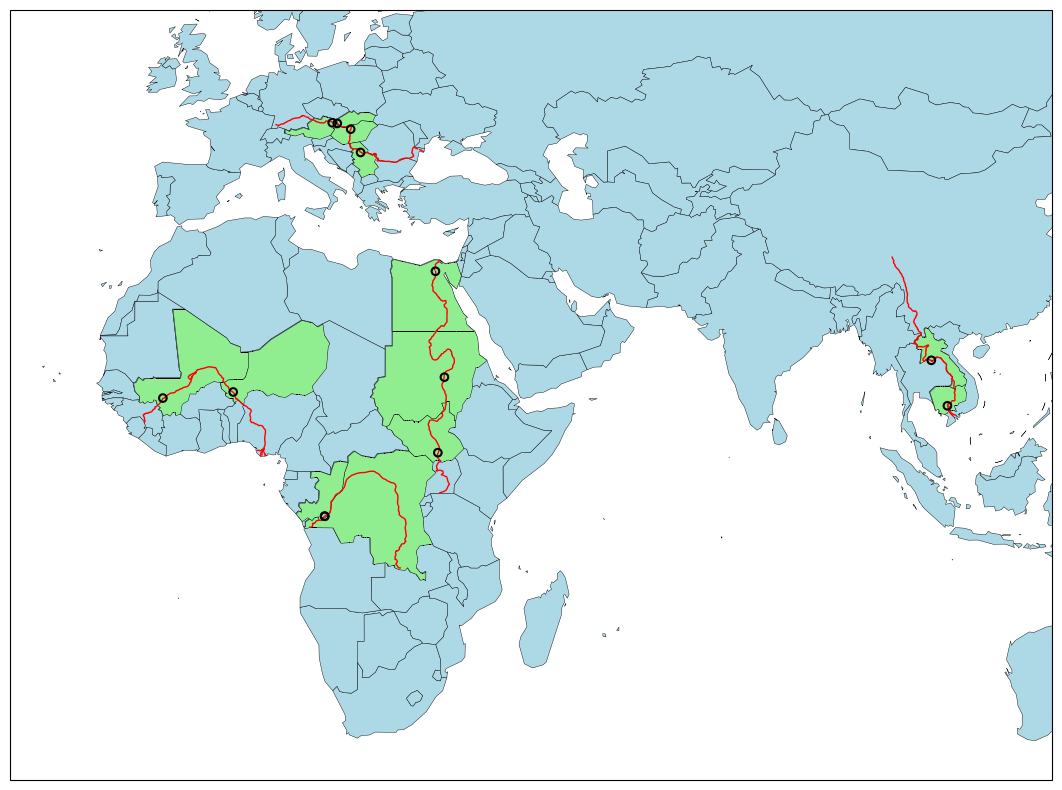

In [3]:
# 流经首都的河流

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 读取数据
world = gpd.read_file('./worldmap4/world_update.json')
world = world.to_crs(ccrs.PlateCarree())
rivers = gpd.read_file('./river/ne_50m_rivers_lake_centerlines.shp')
rivers = rivers.to_crs(ccrs.PlateCarree())


countries_to_fill = ['柬埔寨', '老挝', '刚果（金）', '刚果（布）', '马里', '尼日尔', '埃及', '苏丹', '南苏丹', '奥地利', '匈牙利', '塞尔维亚', '斯洛伐克']
rivers_to_fill = ['Nile', 'White Nile', 'Damietta Branch', 'Mekong', 'Lualaba', 'Congo', 'Danube', 'Sfântu Gheorghe branch', 'Niger']
lat1, lon1 = 17.96232562580174, 102.61118194031367   # 万象
lat2, lon2 = 11.557384130754683, 104.92773994940228   # 金边
lat3, lon3 = 30.046440937603307, 31.235117558539653   # 开罗
lat4, lon4 = 15.600067138432657, 32.529402767155034   # 喀土穆
lat5, lon5 = 4.854133127611956, 31.582505970121243   # 朱巴
lat6, lon6 = -4.303620336484073, 15.31254804749304   # 金沙萨
lat7, lon7 = -4.271532257282476, 15.277094297066055   # 布拉柴维尔
lat8, lon8 = 12.648269458834022, -7.996869335873068   # 巴马科
lat9, lon9 = 13.511233652392134, 2.125040884212267   # 尼亚美
lat10, lon10 = 48.223546608523755, 16.382827282546447   # 维也纳
lat11, lon11 = 48.14774427219382, 17.110161701671508   # 布拉迪斯拉发
lat12, lon12 = 47.498487991715976, 19.040593166560612   # 布达佩斯
lat13, lon13 = 44.81879553526021, 20.460454417360314   # 贝尔格莱德



fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for country in countries_to_fill:
    country_data = world[world['name'] == country]
    if not country_data.empty:
        country_data.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for river in rivers_to_fill:
    river_data = rivers[rivers['name_en'] == river]
    if not river_data.empty:
        river_data.plot(ax=ax, color='red', linewidth=1, transform=ccrs.PlateCarree())

lonList = [lon1, lon2, lon3, lon4, lon5, lon6, lon7, lon8, lon9, lon10, lon11, lon12, lon13]
latList = [lat1, lat2, lat3, lat4, lat5, lat6, lat7, lat8, lat9, lat10, lat11, lat12, lat13]
ax.scatter(lonList, latList, edgecolor='black', facecolor='none', marker='o', s=30, linewidths=1.5, zorder=5, transform=ccrs.PlateCarree())


# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 设置地图显示范围
ax.set_extent([120, -30, -40, 60], crs=ccrs.PlateCarree())

# 保存图像并显示
# plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


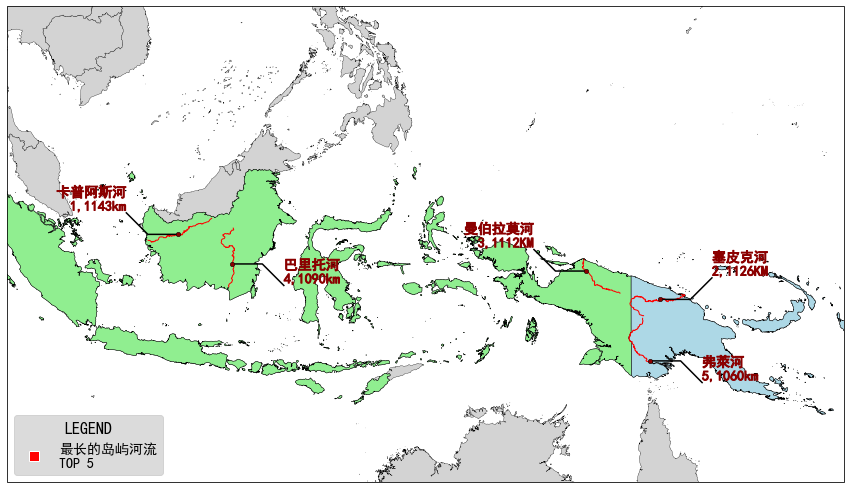

In [2]:
# 岛上的河流

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def loopFillColor(world, countryList, color):
    for country in countryList:
        country_data = world[world['FCNAME'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, transform=ccrs.PlateCarree())


def loopDrawRiver(rivers, riverList, specialList, color):
    for river in riverList:
        river_data = rivers[rivers['name_en'] == river]
        if not river_data.empty:
            river_data.plot(ax=ax, color=color, linewidth=1, transform=ccrs.PlateCarree())
        if any(element[0] == river for element in specialList):
            name = rivers[rivers['name_en'] == river]['name_zh'].values[0]
            rank = [item for item in specialList if item[0] == river][0][6]
            words = name + '\n' + rank
            lon = [item for item in specialList if item[0] == river][0][1]
            lat = [item for item in specialList if item[0] == river][0][2]
            direction1 = [item for item in specialList if item[0] == river][0][3]
            direction2 = [item for item in specialList if item[0] == river][0][4]
            angle = [item for item in specialList if item[0] == river][0][5]
            lineMark(2, angle, 2, lon, lat, direction1, direction2, words, 'darkred')


def lineMark(horizontal_length, angle, line_length, lon, lat, direction1, direction2, content, color):
    if direction1 == 1:
        end_lon = lon + horizontal_length
        end_lat = lat
        if direction2 == 1:
            final_lon = end_lon + line_length * np.cos(np.radians(angle))
            final_lat = end_lat + line_length * np.sin(np.radians(angle))
        elif direction2 == 0:
            final_lon = end_lon + line_length * np.cos(np.radians(angle))
            final_lat = end_lat - line_length * np.sin(np.radians(angle))
        else:
            print('direction2 type error')
        ax.scatter(lon, lat, edgecolor='black', facecolor=color, marker='o', s=20, linewidths=0.5, zorder=5, transform=ccrs.PlateCarree())
        ax.plot([lon, end_lon, final_lon], [lat, end_lat, final_lat], color='black', transform=ccrs.PlateCarree(), zorder=4)
        txt = ax.text(final_lon, final_lat, f"{content}", verticalalignment='bottom', horizontalalignment='left', transform=ccrs.PlateCarree(), fontsize=14, weight='bold', color='darkred')
        txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='darkred')])
    elif direction1 == 0:
        end_lon = lon - horizontal_length
        end_lat = lat
        if direction2 == 1:
            final_lon = end_lon - line_length * np.cos(np.radians(angle))
            final_lat = end_lat + line_length * np.sin(np.radians(angle))
        elif direction2 == 0:
            final_lon = end_lon - line_length * np.cos(np.radians(angle))
            final_lat = end_lat - line_length * np.sin(np.radians(angle))
        else:
            print('direction2 type error')
        ax.scatter(lon, lat, edgecolor='black', facecolor=color, marker='o', s=20, linewidths=0.5, zorder=5, transform=ccrs.PlateCarree())
        ax.plot([lon, end_lon, final_lon], [lat, end_lat, final_lat], color='black', transform=ccrs.PlateCarree(), zorder=4)
        txt = ax.text(final_lon, final_lat, f"{content}", verticalalignment='bottom', horizontalalignment='right', transform=ccrs.PlateCarree(), fontsize=14, weight='bold', color='darkred')
        txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='darkred')])
    else:
        print('direction1 type error')


# 读取地图和河流数据
world = gpd.read_file('./worldmap1/World_countries.shp')
# world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
rivers = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
rivers = rivers.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

countries_to_fill1 = ['印度尼西亚']
loopFillColor(world, countries_to_fill1, 'lightgreen')
countries_to_fill2 = ['巴布亚新几内亚']
loopFillColor(world, countries_to_fill2, 'lightblue')
rivers_to_fill = ['Kapuas', 'Barito', 'Fly', 'Sepik', 'Mamberamo', 'Taritatu']
specialList = [['Kapuas', 111.2424848420747, 0.12485335949005141, 0, 1, 45, '1,1143km'], 
               ['Barito', 114.76336254253512, -1.8194250015978013, 1, 0, 45, '4,1090km'], 
               ['Fly', 142.2496519331932, -8.172092779746366, 1, 0, 45, '5,1060km'], 
               ['Sepik', 142.89588674048287, -4.1454953452195, 1, 1, 45, '2,1126KM'], 
               ['Mamberamo', 138.0261227354159, -2.285639547815169, 0, 1, 45, '3,1112KM']]
loopDrawRiver(rivers, rivers_to_fill, specialList, 'red')

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='最长的岛屿河流\nTOP 5', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='LEGEND', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([100, 155, -16, 15], crs=ccrs.PlateCarree())

# 保存图像并显示
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


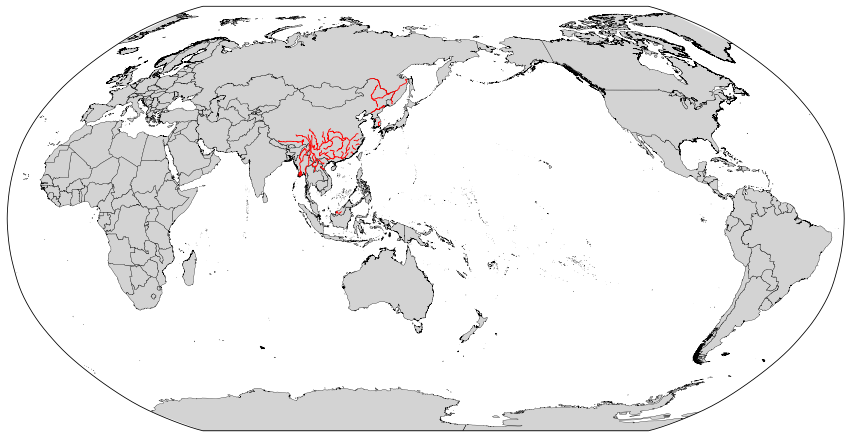

In [5]:
# 江与河
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 世界地图
world = gpd.read_file('./worldmap1/World_countries.shp')
world = world.to_crs(ccrs.PlateCarree())
# 世界河流
rivers = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
filtered_rivers = rivers[rivers['name_zh'].str.contains('江', na=False)] # 过滤出中文名称中有江字的河流
filtered_rivers = filtered_rivers[filtered_rivers['name_zh'] != '雅鲁藏布江'] # 删除原本的雅鲁藏布江数据集
han = rivers[rivers['name_zh'] == '汉水'] # 获取汉水（汉江）数据
lancang = rivers[rivers['name'] == 'Lancang'] # 获取澜沧江数据
filtered_rivers = pd.concat([filtered_rivers, han, lancang])
filtered_rivers = filtered_rivers.to_crs(ccrs.PlateCarree())
# 读取新的雅鲁藏布江数据
ylzb = gpd.read_file('./kml2geojson/ylzb.json')
ylzb = ylzb.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(central_longitude=150)})
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
filtered_rivers.plot(ax=ax, color='red', linewidth=0.8, transform=ccrs.PlateCarree())
ylzb.plot(ax=ax, color='red', linewidth=0.8, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([-180, 180, -60, 75], crs=ccrs.PlateCarree())

plt.savefig('output2.png', dpi=600, bbox_inches='tight')
plt.show()


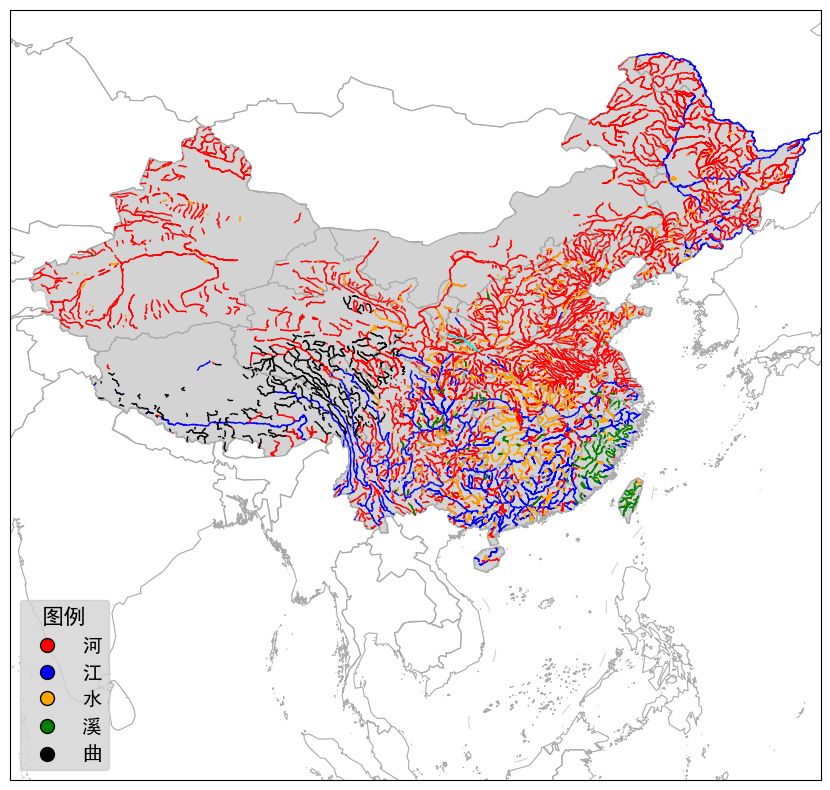

In [ ]:
# 中国河流的名字

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects
from shapely.geometry import LineString, MultiLineString

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

world = gpd.read_file('./worldmap4/world.geojson')
world = world.to_crs(ccrs.PlateCarree())
china = gpd.read_file('./shp2json/chinaprovince.geojson')
china = china.to_crs(ccrs.PlateCarree())

river1 = gpd.read_file('./river/level1/level1.shp')
river1 = river1.to_crs(ccrs.PlateCarree())
river2 = gpd.read_file('./river/level2/level2.shp')
river2 = river2.to_crs(ccrs.PlateCarree())
river3 = gpd.read_file('./river/level3/level3.shp')
river3 = river3.to_crs(ccrs.PlateCarree())
river4 = gpd.read_file('./river/level4/level4.shp')
river4 = river4.to_crs(ccrs.PlateCarree())
river5 = gpd.read_file('./river/level5/level5.shp')
river5 = river5.to_crs(ccrs.PlateCarree())
river_all = pd.concat([river1, river2, river3, river4, river5])
jiang = river_all[river_all['NAME'].str.contains('江', na=False)]
he = river_all[river_all['NAME'].str.contains('河', na=False)]
shui = river_all[river_all['NAME'].str.contains('水', na=False)]
xi = river_all[river_all['NAME'].str.contains('溪', na=False)]
qu = river_all[river_all['NAME'].str.contains('曲', na=False)]
jian = river_all[river_all['NAME'].str.contains('泾', na=False)]
heilongjiang = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
heilongjiang = heilongjiang.to_crs(ccrs.PlateCarree())
heilongjiang = heilongjiang[heilongjiang['name_zh'] == '黑龙江'] 


fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='none', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
china.plot(ax=ax, color='lightgrey', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
jiang.plot(ax=ax, color='blue', linewidth=1, transform=ccrs.PlateCarree())
he.plot(ax=ax, color='red', linewidth=1, transform=ccrs.PlateCarree())
shui.plot(ax=ax, color='orange', linewidth=1, transform=ccrs.PlateCarree())
xi.plot(ax=ax, color='green', linewidth=1, transform=ccrs.PlateCarree())
qu.plot(ax=ax, color='black', linewidth=1, transform=ccrs.PlateCarree())
jian.plot(ax=ax, color='cyan', linewidth=1, transform=ccrs.PlateCarree())
heilongjiang.plot(ax=ax, color='blue', linewidth=1, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=10, label='河', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=10, label='江', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='orange', markersize=10, label='水', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='green', markersize=10, label='溪', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='black', markersize=10, label='曲', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([72, 136, 2, 56], crs=ccrs.PlateCarree())

# plt.savefig('output2.png', dpi=600, bbox_inches='tight')
plt.show()


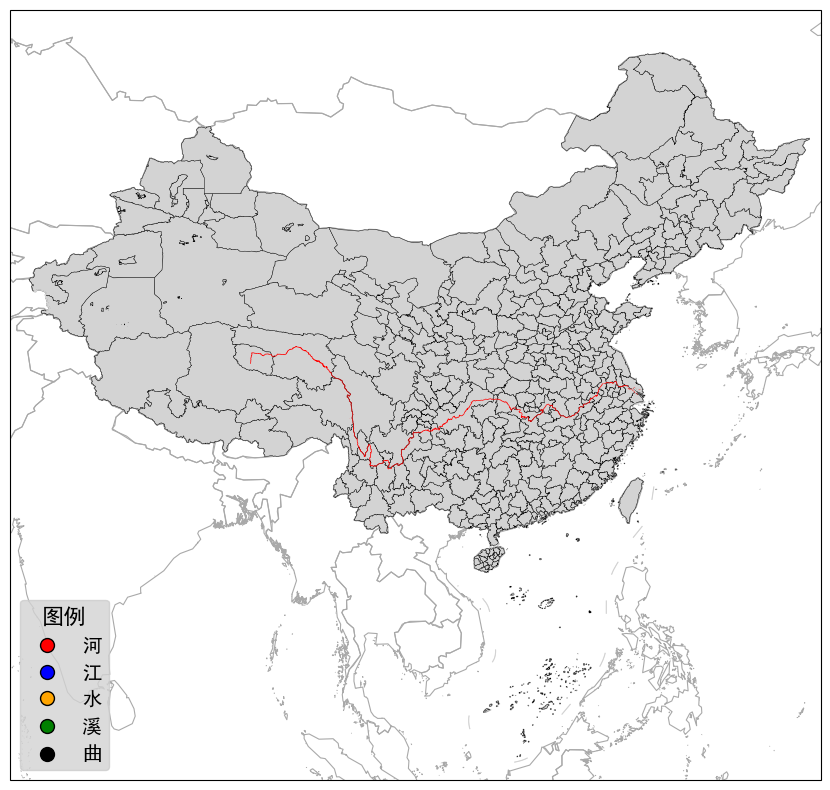

In [ ]:
# 长江测试

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects
from shapely.geometry import LineString, MultiLineString

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

world = gpd.read_file('./worldmap4/world.geojson')
world = world.to_crs(ccrs.PlateCarree())
china = gpd.read_file('./shp2json/chinaprovince.geojson')
china = china.to_crs(ccrs.PlateCarree())
province = gpd.read_file('./shp2json/chinacity.geojson')
province = province.to_crs(ccrs.PlateCarree())

river1 = gpd.read_file('./river/level1/level1.shp')
river1 = river1.to_crs(ccrs.PlateCarree())
changjiang = river1[river1['NAME'] == '长江'] 
jinshajiang = river1[river1['NAME'] == '金沙江']
tongtianhe = river1[river1['NAME'] == '通天河']
tuotuohe = river1[river1['NAME'] == '沱沱河']
river = pd.concat([changjiang, jinshajiang, tongtianhe, tuotuohe])
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='none', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
china.plot(ax=ax, color='lightgrey', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
province.plot(ax=ax, color='lightgrey', edgecolor='k', linewidth=0.3, transform=ccrs.PlateCarree())
river.plot(ax=ax, color='red', linewidth=0.5, transform=ccrs.PlateCarree())


legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=10, label='河', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=10, label='江', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='orange', markersize=10, label='水', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='green', markersize=10, label='溪', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='black', markersize=10, label='曲', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([72, 136, 2, 56], crs=ccrs.PlateCarree())

plt.savefig('test.png', dpi=2000, bbox_inches='tight')
plt.show()


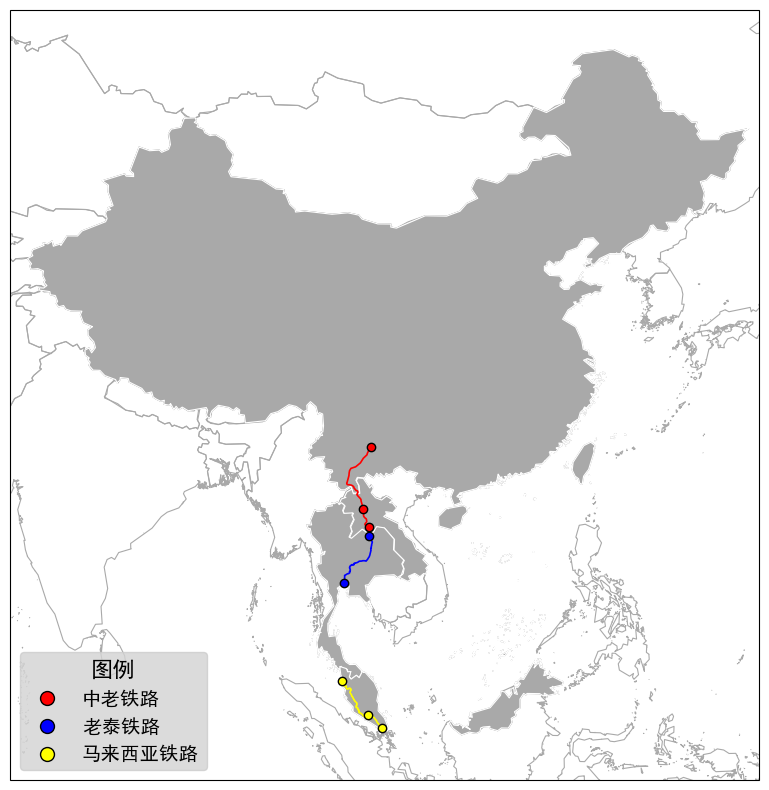

In [4]:
# China-Laos-Thailand-Malaysia-Singapore trians compare
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def loopFillColor(world, ax, countryList, color):
    for country in countryList:
        country_data = world[world['NAME_CHN'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='white', linewidth=0.8, transform=ccrs.PlateCarree())


world = gpd.read_file('./worldmap4/world.geojson')
world = world.to_crs(ccrs.PlateCarree())

lat1, lon1 = 24.900517541950194, 102.82233979816232   # 昆明
lat2, lon2 = 19.887929264133415, 102.14993202253484   # 琅勃拉邦
lat3, lon3 = 18.37567090187491, 102.64085689210347   # 万象1
lat3_, lon3_ = 17.67567090187491, 102.64085689210347   # 万象2
lat4, lon4 = 13.781012413822213, 100.52639829532824   # 曼谷
lat5, lon5 = 5.414172605411322, 100.38983201205296   # 槟城
lat6, lon6 = 2.5816085966821998, 102.61260431970223   # 金马士
lat7, lon7 = 1.4265019203095592, 103.77170239297176   # 新加坡

line_malaysia = gpd.read_file('./kml2geojson/malaysia.geojson')
line_malaysia = line_malaysia.to_crs(ccrs.PlateCarree())
line_china_laos_thailand = gpd.read_file('./kml2geojson/china_laos_thailand.geojson')
line_china_laos_thailand = line_china_laos_thailand.to_crs(ccrs.PlateCarree())
line_china = line_china_laos_thailand[line_china_laos_thailand['name'] == '中老']
line_thailand = line_china_laos_thailand[line_china_laos_thailand['name'] == '老泰']

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='none', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
countries_to_fill1 = ['中国', '老挝', '泰国', '马来西亚', '新加坡']
loopFillColor(world, ax, countries_to_fill1, 'darkgray')
ax.scatter([lon1, lon2, lon3], [lat1, lat2, lat3], color='red', edgecolor='black', marker='o', zorder=5, transform=ccrs.PlateCarree())
ax.scatter([lon3_, lon4], [lat3_, lat4], color='blue', edgecolor='black', marker='o', zorder=5, transform=ccrs.PlateCarree())
ax.scatter([lon5, lon6, lon7], [lat5, lat6, lat7], color='yellow', edgecolor='black', marker='o', zorder=5, transform=ccrs.PlateCarree())
line_china.plot(ax=ax, color='red', linewidth=1.2, transform=ccrs.PlateCarree())
line_thailand.plot(ax=ax, color='blue', linewidth=1.2, transform=ccrs.PlateCarree())
line_malaysia.plot(ax=ax, color='yellow', linewidth=1.2, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=10, label='中老铁路', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=10, label='老泰铁路', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='yellow', markersize=10, label='马来西亚铁路', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([72, 136, -3, 56], crs=ccrs.PlateCarree())

plt.savefig('output2.png', dpi=1200, bbox_inches='tight')
plt.show()


In [4]:
import geopandas as gpd

test_data = gpd.read_file('./cultural/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp')
test_data.head(5)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 states provinces,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 states provinces,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20012 -32.4472, -58.20011 -32.44..."
2,Admin-1 states provinces,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
3,Admin-1 states provinces,6,MYS-1186,1186,MY-12,None,MY,5,Sabah,North Borneo,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,Admin-1 states provinces,3,CHL-2694,2694,CL-AP,None,CL,1,Arica y Parinacota,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."


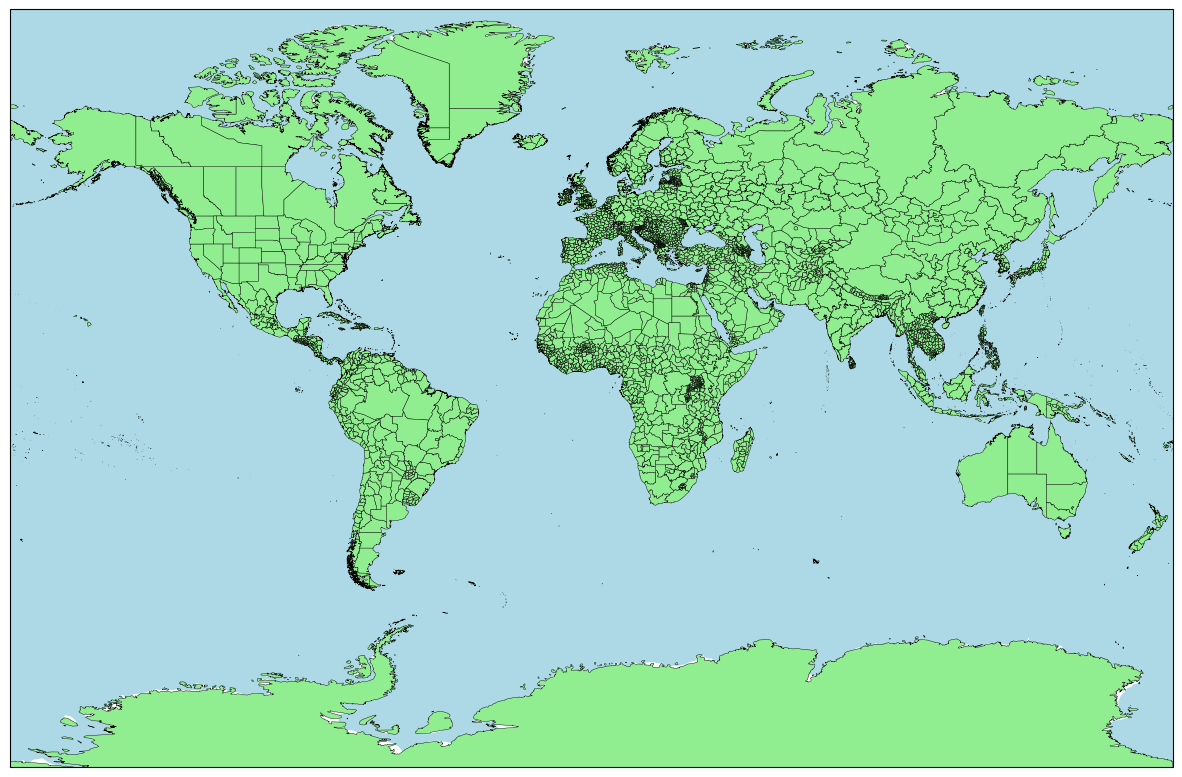

In [5]:
# 世界一级行政区
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# 读取地图数据
world = gpd.read_file('./cultural/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp')
world = world.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
ax.add_feature(cfeature.OCEAN, color='lightblue')
world.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([-180, 180, -85, 85], crs=ccrs.PlateCarree())
plt.savefig('output1.png', dpi=1200, bbox_inches='tight')
plt.show()


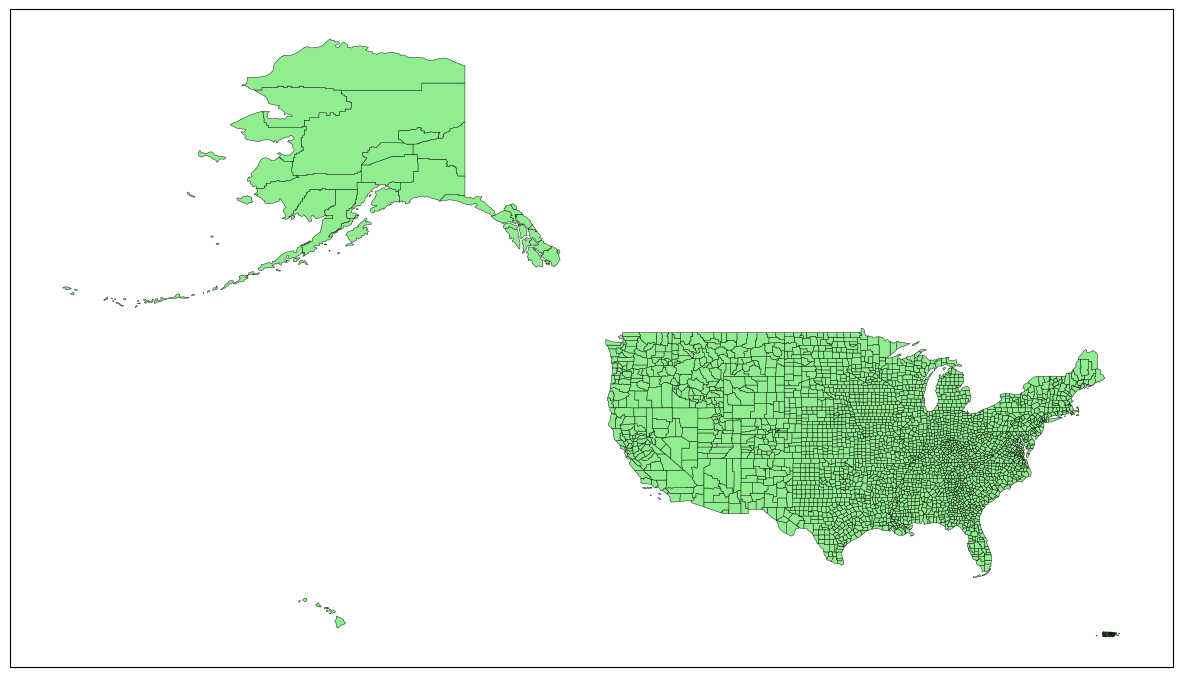

In [ ]:
# 美国县城
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# 读取地图数据
world = gpd.read_file('./shp2json/us_county.geojson')
world = world.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=-100)})
world.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([170, -60, 10, 75], crs=ccrs.PlateCarree())
plt.savefig('output2.png', dpi=1200, bbox_inches='tight')
plt.show()
